In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [354]:
# df_mfe = pd.read_csv("/Users/bryan/Studio/tools/mix_10.csv")
# df_mfe = pd.read_csv('/Users/bryan/Studio/seq/data/samples/21.csv')
# df_mfe = pd.read_excel('/Users/bryan/Documents/SeqDataSets/200313/200313s10_100.xls')
# df_mfe = pd.read_csv('/Users/bryan/Studio/seq2/compounds.csv')
# df_mfe = pd.read_csv('/Users/bryan/Documents/SeqDataSets/signal_to_noise_20/SLZ_200313_10_0610_20_k.csv')
# df_mfe = pd.read_csv('/Users/bryan/Documents/SeqDataSets/signal_to_noise_5/SLZ_200313_10_0606_z.csv')
df_mfe = pd.read_excel('/Users/bryan/Documents/SeqDataSets/signal_to_noise_5/SLZ_200313_s09_0619_qs.xls')
df_mfe.shape

(2553, 33)

Text(0, 0.5, 'RT')

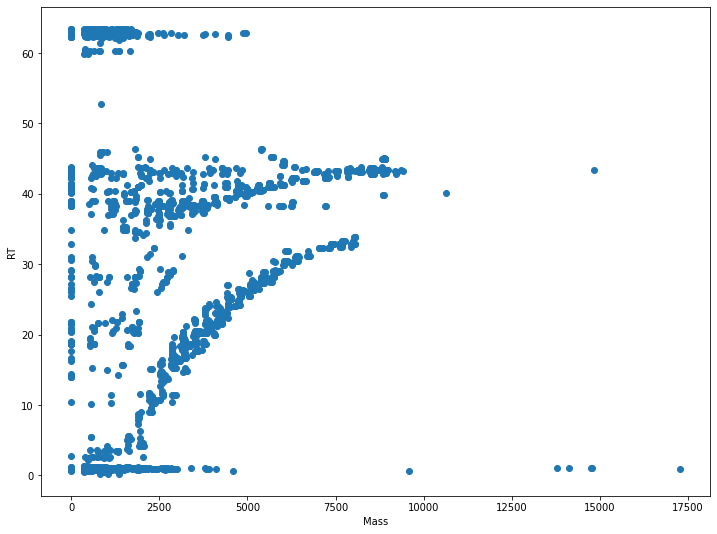

In [355]:
plt.figure(figsize=(12, 9))
plt.scatter(df_mfe['Mass'], df_mfe['RT'])
plt.xlabel('Mass')
plt.ylabel('RT')

In [356]:
TAG = 826.3184
# TAG = 694.2397
# endmass_3p = 6781.0487 #6781.0763 #19
# endmass_3p = 7079.0771 #7079.0861 #20
# endmass_3p = 7522.1059 #7522.1079 #21
# endmass_3p = 7088.0804 #7088.0775 #201
# endmass_3p = 6985.0463 #6985.0417 #202
# endmass_3p = 7073.0771 #7073.0735 #203
# endmass_3p = 6954.9782 #6954.9831 #204
# endmass_3p = 7110.0904 #7110.0883 #205
# endmass_3p = 7151.113 #206
# endmass_3p = 7193.0523 #207

endmass_3p = 8832.4031 #8832.3519 #s09
# endmass_3p = 9501.5099 #9501.4446 #s10
# endmass_3p = 10190.5566 #s12
# endmass_3p = 7234.1721 #s13
sum_value = round(endmass_3p + 18.0106, 1)

endmass_5p = sum_value - 80 - TAG
masses = df_mfe.Mass
BIAS = 0.1
end5p_idxs = masses[(masses>=endmass_5p-BIAS) & (masses<=endmass_5p+BIAS)].index
end5p_df = df_mfe.loc[end5p_idxs]
print("5' ladder end mass {}, found \n{}".format(endmass_5p, end5p_df[['Mass', 'RT', 'Vol']]))

masses = df_mfe.Mass
end3p_idxs = masses[(masses>=endmass_3p-BIAS) & (masses<=endmass_3p+BIAS)].index
end3p_df = df_mfe.loc[end3p_idxs]
print("3' ladder end mass {}, found \n{}".format(endmass_3p, end3p_df[['Mass', 'RT', 'Vol']]))

5' ladder end mass 7944.0815999999995, found 
           Mass      RT       Vol
1100  7944.0958  32.904  17199908
1124  7944.0846  32.395    842231
3' ladder end mass 8832.4031, found 
          Mass      RT        Vol
256  8832.3746  44.930    2632486
364  8832.4031  43.316  411847712


In [357]:
end5p_df = end5p_df.drop(1124)
end3p_df = end3p_df.drop(256)

In [339]:
end5p_idx = end5p_df['Vol'].idxmax()
df5p_endpoint = end5p_df.loc[end5p_idx]
df5p_endpoint[['Mass', 'RT', 'Vol']]

Mass      8613.23
RT         36.378
Vol     167130240
Name: 600, dtype: object

In [358]:
PPM = 10
base_masses = [305.0413, 329.0525, 345.0474, 306.0253, 359.0631, 308.041, 319.0569, 320.041, 373.0787, 343.0682, 570.1475, 212.0086, 557.2251, 688.1156, 625.0844]

df = df_mfe.sort_index()
df5p = start5p_df = pd.DataFrame([[18.0106, 0.01, 10000],
                          [347.0631, 0.01, 10000],
                          [323.0519, 0.01, 10000], 
                          [363.058, 0.01, 10000], 
                          [324.0359, 0.01, 10000]], columns=['Mass', 'RT', 'Vol']).reindex()
df3p = start3p_df = pd.DataFrame([[18.0106, 0.01, 10000], [TAG, 6.66, 20000]], columns=['Mass', 'RT', 'Vol']).reindex()



In [359]:
df3p = start3p_df = pd.DataFrame([[TAG, 6.66, 20000]], columns=['Mass', 'RT', 'Vol']).reindex()

In [360]:

df5p = start5p_df = pd.DataFrame([
                          [347.0631, 0.01, 10000],
                          [323.0519, 0.01, 10000], 
                          [363.058, 0.01, 10000], 
                          [324.0359, 0.01, 10000]], columns=['Mass', 'RT', 'Vol']).reindex()

[ 0.001281   -0.12182986]


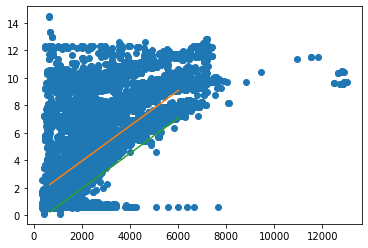

In [997]:
# x = np.array([668.0955, 973.1367, 5775.7534, 6024.8510])
# y = np.array([0.7340, 0.8460, 7.781, 7.596])
x_ends = np.array([668.0955, 6024.8510])
y_ends = np.array([0.7340, 7.596])
z = np.polyfit(x_ends, y_ends, 1)
def f(x):
    return z[0]*x + z[1]
#     return z[0]*x*x + z[1]*x + z[2]
# x = common_df5p.Mass.sort_values()
plt.scatter(df_mfe['Mass'], df_mfe['RT'])
plt.plot(x_ends, f(x_ends))
plt.plot(x_ends, f(x_ends)+1.5)
plt.plot(x_ends, f(x_ends)-0.5)
print(z)

In [343]:
def basecalling_minus(df_x, df_y, rt_strict=False, untagged=False):
    print("basecalling_plus params {} {}".format(df_x, df_y.shape))
    df_total = df_x.copy()
    if untagged:
        df_x.Mass = df_x.Mass + 80
    while True:
        idxs = list()
        mass_x = np.array(df_x.Mass)
        mass_y = np.array(df_y.Mass)
        rt_x = np.array(df_x.RT)
        rt_y = np.array(df_y.RT)
        for base_mass in base_masses:
#             ppm_matrix = np.abs((np.abs(mass_x[:, np.newaxis] - mass_y) - base_mass) * 1E6 / (mass_y + base_mass))
            ppm_matrix = np.abs((mass_x[:, np.newaxis] - mass_y - base_mass) * 1E6 /  (mass_y + base_mass))
#             ppm_matrix = np.abs((mass_x[:, np.newaxis] - mass_y - base_mass) * 1E6 /  mass_y)
#             ppm_matrix = np.abs((-mass_x[:, np.newaxis] + mass_y - base_mass) * 1E6 / base_mass)
            within_ppm10 = ppm_matrix < 10
            ppm_df = pd.DataFrame(ppm_matrix)
#             base_connects = ppm_df[ppm_df < 10]

            rt_matrix = rt_x[:, np.newaxis] - rt_y
            if rt_strict:
                diff_rt_low = 0
            else:
                diff_rt_low = -0.5
            is_rt_asc = (rt_matrix > diff_rt_low) & (rt_matrix < 1.8)
            mask = within_ppm10# & is_rt_asc
            
            mask_df = pd.DataFrame(mask)
            base_connects = ppm_df[mask_df]
            
            idx_pairs = list(base_connects[base_connects.notnull()].stack().index)
            df5_idxs = [pair[1] for pair in idx_pairs]
            df5_idxs = list(set(df5_idxs))
            if df5_idxs:
                idxs.extend(df5_idxs)

        if not idxs:
            break
        idxs = list(set(idxs))
        if idxs:
            print("number of indexes {}".format(len(idxs)))
        moved = df_y.iloc[idxs]
        mass_x = np.append(mass_x, np.array(moved.Mass))
#         if untagged:
#             df_x = moved[(moved.RT >= f(moved.Mass)-0.5) & (moved.RT <= f(moved.Mass)+1.5)]
#         else:
        df_x = moved
        df_total = df_total.append(df_x)
        df_y = df_y.drop(moved.index)
        mass_y = np.delete(mass_y, idxs)
    
    print(df_total.shape)
    return df_total, df_y

In [149]:
def basecalling_plus(df_x, df_y, rt_strict=False):
    print("basecalling_plus params {} {} {}".format(df_x.shape, df_y.shape, rt_strict))
    df_total = df_x.copy()
    while True:
        idxs = list()
        mass_x = np.array(df_x.Mass)
        mass_y = np.array(df_y.Mass)
        rt_x = np.array(df_x.RT)
        rt_y = np.array(df_y.RT)
        for base_mass in base_masses:
            ppm_matrix = np.abs((-mass_x[:, np.newaxis] + mass_y - base_mass) * 1E6 /  (mass_y + base_mass))
            within_ppm10 = ppm_matrix < 10
            ppm_df = pd.DataFrame(ppm_matrix)
#             base_connects = ppm_df[ppm_df < 10]
            
            rt_matrix = -rt_x[:, np.newaxis] + rt_y
            if rt_strict:
                diff_rt_low = 0
            else:
                diff_rt_low = -0.5
            is_rt_asc = (rt_matrix > diff_rt_low) & (rt_matrix < 1.5)
            mask = within_ppm10 #& is_rt_asc
            
            mask_df = pd.DataFrame(mask)
            base_connects = ppm_df[mask_df]
            
            idx_pairs = list(base_connects[base_connects.notnull()].stack().index)
            df5_idxs = [pair[1] for pair in idx_pairs]
            df5_idxs = list(set(df5_idxs))
            if df5_idxs:
                idxs.extend(df5_idxs)

        if not idxs:
            break
        idxs = list(set(idxs))
        if idxs:
            print("number of indexes {}".format(len(idxs)))
        moved = df_y.iloc[idxs]
        mass_x = np.append(mass_x, np.array(moved.Mass))
        df_total = df_total.append(moved)
        df_x = moved
        df_y = df_y.drop(moved.index)
        mass_y = np.delete(mass_y, idxs)
    
    print(df_total.shape)
    return df_total, df_y

In [361]:
df3p, _ = basecalling_plus(df3p, df)

basecalling_plus params (1, 3) (2553, 33) False
number of indexes 5
number of indexes 6
number of indexes 9
number of indexes 13
number of indexes 13
number of indexes 13
number of indexes 9
number of indexes 7
number of indexes 11
number of indexes 9
number of indexes 10
number of indexes 9
number of indexes 13
number of indexes 21
number of indexes 19
number of indexes 10
number of indexes 6
number of indexes 9
number of indexes 8
number of indexes 16
number of indexes 41
number of indexes 11
number of indexes 1
(270, 33)


In [362]:
end3p_df

,Unnamed: 0,m/z,RT,Height,Mass,Quality Score,Width,Score,File,Cpd,...,Vol %,Std Dev,Base Peak,Avg Mass,MS/MS Count,UVA% Area,UVA% Height,Algorithm,Label,Library
364,752,678.4098,43.316,1660374,8832.4031,100.0,0.338,NaN,SLZ_200313_09.d,3695,...,9.25,0.0286,678.7116,8836.9623,NaN,NaN,NaN,Find by Molecular Feature,Cpd 3695: 43.316,NaN


In [363]:
df3p_minus, _ = basecalling_minus(end3p_df, df)

basecalling_plus params      Unnamed: 0       m/z      RT   Height       Mass  Quality Score  Width  \
364         752  678.4098  43.316  1660374  8832.4031          100.0  0.338   

     Score             File   Cpd  ...  Vol % Std Dev  Base Peak   Avg Mass  \
364    NaN  SLZ_200313_09.d  3695  ...   9.25  0.0286   678.7116  8836.9623   

     MS/MS Count UVA% Area  UVA% Height                  Algorithm  \
364          NaN       NaN          NaN  Find by Molecular Feature   

                Label  Library  
364  Cpd 3695: 43.316      NaN  

[1 rows x 33 columns] (2553, 33)
number of indexes 9
number of indexes 8
number of indexes 8
number of indexes 6
number of indexes 6
number of indexes 6
number of indexes 10
number of indexes 16
number of indexes 17
number of indexes 23
number of indexes 27
number of indexes 28
number of indexes 49
number of indexes 65
number of indexes 87
number of indexes 82
number of indexes 86
number of indexes 94
number of indexes 57
number of indexes 31
num

In [128]:
df5p, _ = basecalling_plus(df5p, df, rt_strict=True)

basecalling_plus params (5, 3) (343, 124) True
number of indexes 4
number of indexes 2
number of indexes 2


/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


number of indexes 5
number of indexes 5
number of indexes 2
number of indexes 4
number of indexes 7
number of indexes 12
number of indexes 11
number of indexes 9
number of indexes 11
number of indexes 11
number of indexes 8
number of indexes 7
number of indexes 5
(110, 124)


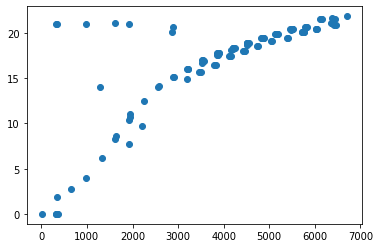

In [129]:
plt.scatter(df5p.Mass, df5p.RT)

In [16]:
df5p_minus, _ = basecalling_minus(end5p_df, df, untagged=True)

basecalling_plus params      Unnamed: 0       m/z     RT  Height       Mass  Quality Score  Abund  \
226         226  668.4205  7.744  220091  6024.8491          100.0    NaN   
243         243  752.0968  7.579    7720  6024.8323           77.3    NaN   

     Score             File  Area  ...  Cpds/Group       Vol  Vol %  Std Dev  \
226    NaN  NZ_180521_s04.d   NaN  ...           7  14336683  11.10   0.0063   
243    NaN  NZ_180521_s04.d   NaN  ...           3    101224   0.08      NaN   

     Width  Base Peak   Avg Mass                  Algorithm           Label  \
226  0.094   668.6434  6027.8437  Find by Molecular Feature  Cpd 308: 7.744   
243  0.079   752.3476  6026.6312  Find by Molecular Feature  Cpd 291: 7.579   

     Flag Severity (Tgt)  
226                  NaN  
243                  NaN  

[2 rows x 39 columns] (532, 39)
number of indexes 1
number of indexes 3
number of indexes 1
number of indexes 1
number of indexes 1
number of indexes 1
number of indexes 1
number of i

In [1048]:
df3p.shape, df5p.shape, df.shape

((698, 7), (4345, 7), (12193, 7))

In [1032]:
df3p_minus.shape, df5p_minus.shape, df.shape

((8764, 7), (8422, 7), (12193, 7))

In [1033]:
df5p = df5p.append(end5p_df.loc[end5p_idx])
df3p = df3p.append(end3p_df)
df5p_minus = df5p_minus.append(end5p_df.loc[end5p_idx])
df3p_minus = df3p_minus.append(end3p_df)

Text(0, 0.5, 'RT')

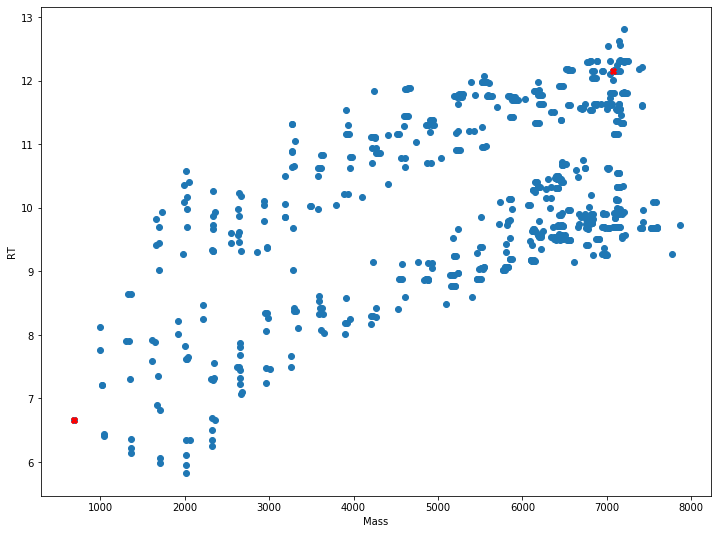

In [1049]:
plt.figure(figsize=(12, 9))
# plt.scatter(df5p.Mass, df5p.RT)
plt.scatter(df3p.Mass, df3p.RT)
# plt.scatter(end5p_df.loc[end5p_idx].Mass, end5p_df.loc[end5p_idx].RT, marker='X', color='r')
plt.scatter(end3p_df.Mass, end3p_df.RT, marker='X', color='r')
# plt.scatter(start5p_df.Mass, start5p_df.RT, marker='X', color='r')
plt.scatter(start3p_df.Mass, start3p_df.RT, marker='X', color='r')
plt.xlabel('Mass')
plt.ylabel('RT')

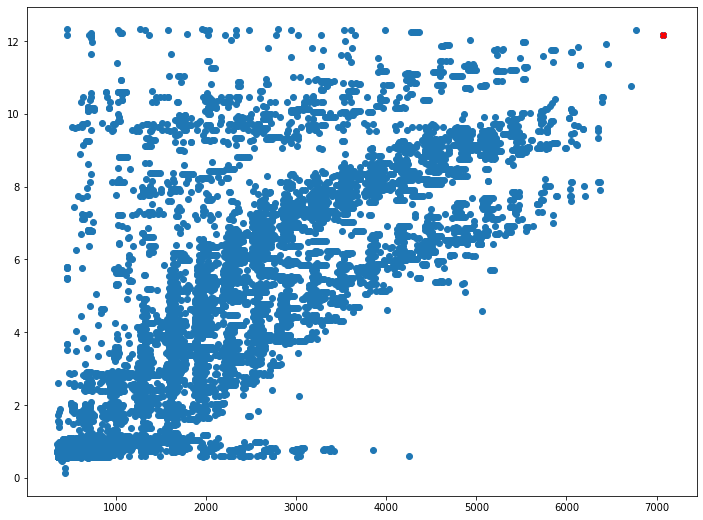

In [1050]:
plt.figure(figsize=(12, 9))
# plt.scatter(df5p_minus.Mass, df5p_minus.RT)
plt.scatter(df3p_minus.Mass, df3p_minus.RT)
# plt.scatter(end5p_df.loc[end5p_idx].Mass, end5p_df.loc[end5p_idx].RT, marker='X', color='r')
plt.scatter(end3p_df.Mass, end3p_df.RT, marker='X', color='r')
# plt.scatter(start5p_df.Mass, start5p_df.RT, marker='X', color='r')

In [745]:
df3p.to_excel('data/3p.xlsx')
df5p.to_excel('data/5p.xlsx')
df_merge = pd.concat([df3p, df5p])
df_merge.to_csv('data/merge.csv')

In [746]:
df3p_minus.to_excel('data/3p.xlsx')
df5p_minus.to_excel('data/5p.xlsx')
df_merge = pd.concat([df3p_minus, df5p_minus])
df_merge.to_csv('data/merge.csv')

In [752]:
df5p[df5p.Mass > 5000][['Mass', 'RT', 'Vol']]

,Mass,RT,Vol
172,5139.6473,7.185,49916
452,5133.6738,8.155,6587
21,5117.6579,7.186,642289
181,5468.6916,7.493,43202
364,5131.6719,8.162,11079
319,5161.6312,7.183,15266
380,5447.7236,7.488,10183
340,5797.7489,7.792,12804
363,5490.6783,7.492,11130
406,5776.7922,7.775,8998


In [829]:
df5p_minus[(df5p_minus.Mass < 975) & (df5p_minus.Mass > 972)][['Mass', 'RT', 'Vol']].mean()

Mass       973.1367
RT           0.8460
Vol     224370.0000
dtype: float64

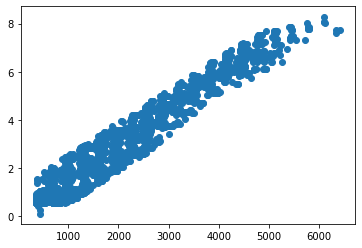

In [933]:
plt.scatter(df5p_minus.Mass, df5p_minus.RT)

In [1051]:
common_idxs_5p = df5p_minus.index & df5p.index
common_idxs_3p = df3p_minus.index & df3p.index

In [1052]:
common_idxs_5p.shape, common_idxs_3p.shape

((3310,), (276,))

[ 0.00135376 -0.30999436]
(276, 7) (3310, 7)


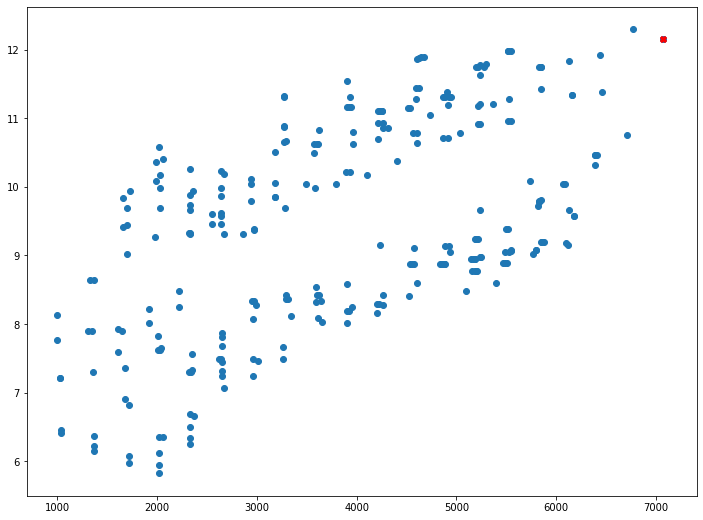

In [1058]:
common_df3p = df_mfe.loc[common_idxs_3p]
common_df5p = df_mfe.loc[common_idxs_5p]
plt.figure(figsize=(12, 9))
# plt.scatter(common_df5p.Mass, common_df5p.RT)
plt.scatter(common_df3p.Mass, common_df3p.RT)
# plt.scatter(end5p_df.loc[end5p_idx].Mass, end5p_df.loc[end5p_idx].RT, marker='X', color='r')
plt.scatter(end3p_df.Mass, end3p_df.RT, marker='X', color='r')
# plt.scatter(start5p_df.Mass, start5p_df.RT, marker='X', color='r')

x = np.array([668.0955, 973.1367, 5775.7534, 6024.8510])
y = np.array([0.7340, 0.8460, 7.781, 7.596])
z = np.polyfit(x, y, 1)
def f(x):
    return z[0]*x + z[1]
#     return z[0]*x*x + z[1]*x + z[2]
# x = common_df5p.Mass.sort_values()
# plt.plot(x, f(x))
# plt.plot(x, f(x)+1.5)
# plt.plot(x, f(x)-0.5)
print(z)
print(common_df3p.shape, common_df5p.shape)

In [974]:
common_df5p.shape

(3327, 7)

(1254, 7)


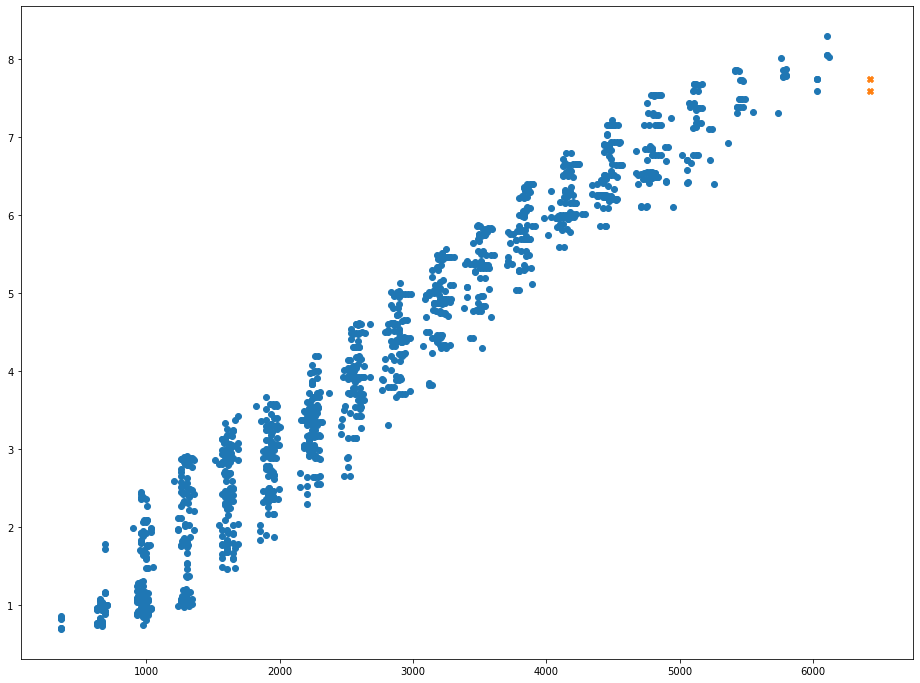

In [938]:
df5p_tmp = common_df5p[(common_df5p.RT >= f(common_df5p.Mass)-0.5) & (common_df5p.RT <= f(common_df5p.Mass)+1.5)]
plt.figure(figsize=(16, 12))
plt.scatter(df5p_tmp['Mass'], df5p_tmp['RT'])
plt.scatter(end5p_df['Mass'], end5p_df['RT'], marker='X')
print(df5p_tmp.shape)

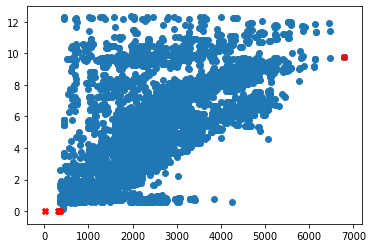

In [950]:
plt.scatter(df3p_minus.Mass, df3p_minus.RT)
# plt.scatter(end5p_df.loc[end5p_idx].Mass, end5p_df.loc[end5p_idx].RT, marker='X', color='r')
plt.scatter(end3p_df.Mass, end3p_df.RT, marker='X', color='r')
plt.scatter(start5p_df.Mass, start5p_df.RT, marker='X', color='r')

In [1060]:
common_df3p = common_df3p[['Cpd', 'Mass', 'RT', 'Vol', 'Width', 'Quality Score']]
common_df5p = common_df5p[['Cpd', 'Mass', 'RT', 'Vol', 'Width', 'Quality Score']]
common_df3p.to_excel('data/3p.xlsx')
common_df5p.to_excel('data/5p.xlsx')
df_merge = pd.concat([df3p_minus, df5p_minus])
df_merge.to_csv('data/merge.csv')

In [1011]:
common_df5p.shape

(3327, 6)

In [941]:
seqs_df = pd.read_csv('/Users/bryan/Studio/seq2/seqs.csv')

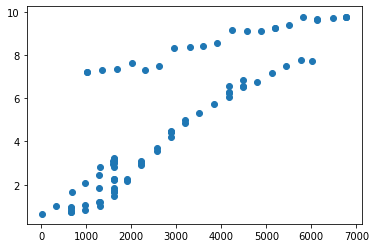

In [947]:
seqs_df = seqs_df[seqs_df.RT < 10]
plt.scatter(seqs_df.Mass, seqs_df.RT)